# __Discovery of Linear Regression__

- __[Linear regression](#Linear-regression-using-the-normal-equation)__
    - __[Batch gradient descent](#Batch-gradient-descent)__
    - __[Stochastic Gradient Descent](#Stochastic-Gradient-Descent)__
    - __[Mini-batch gradient descent](#Mini-batch-gradient-descent)__
    - __[Polynomial Regression](#Polynomial-Regression)__
- __[Logistic Regression](#Logistic-Regression)__
    - __[Softmax Regression](#Softmax-Regression)__

# Linear regression using the Normal Equation

In [50]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy.random as rnd

In [51]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

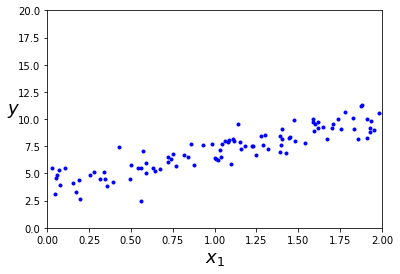

In [52]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 20])
plt.show()

***

___Add x0 = 1 to each instance and calculate Normal Equation___

In [53]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.86501051],
       [3.13916179]])

___Now we will create new X value that we will use to to predict___

In [54]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86501051],
       [10.14333409]])

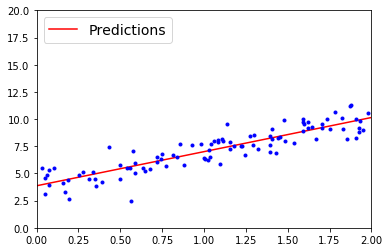

In [55]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 20])
plt.legend(loc="upper left", fontsize=14)
plt.show()

***

### Calculating coeficients using sklearn standar library for Linear Regression

In [56]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86501051]), array([[3.13916179]]))

In [57]:
print("Prediction using sklearn: ", lin_reg.predict(X_new))
print("Prediction using normal e.: ", y_predict)

Prediction using sklearn:  [[ 3.86501051]
 [10.14333409]]
Prediction using normal e.:  [[ 3.86501051]
 [10.14333409]]


***


___<br>
This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the pseudoinverse of $\mathbf{X}$. 
<br>
We can use np.linalg.pinv() to compute the pseudoinverse directly:
<br>___

In [58]:
np.linalg.pinv(X_b).dot(y)

array([[3.86501051],
       [3.13916179]])

___As we can see all of these methods actually have the same results___

# Batch gradient descent

> Code for calculateing gradient descent in bathch using this equotion:
> ### $\theta = \theta - \alpha\frac{2}{m}\sum_{i=1}^m(\theta^T\mathbf{x}^i - y^i)x_j^i$


In [59]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) #random init state of theta

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [60]:
theta

array([[3.86501051],
       [3.13916179]])

In [61]:
X_new_b.dot(theta)

array([[ 3.86501051],
       [10.14333409]])

***

__<br>
Now we will plot and see how learning rate influencis equation.
<br>__

In [62]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

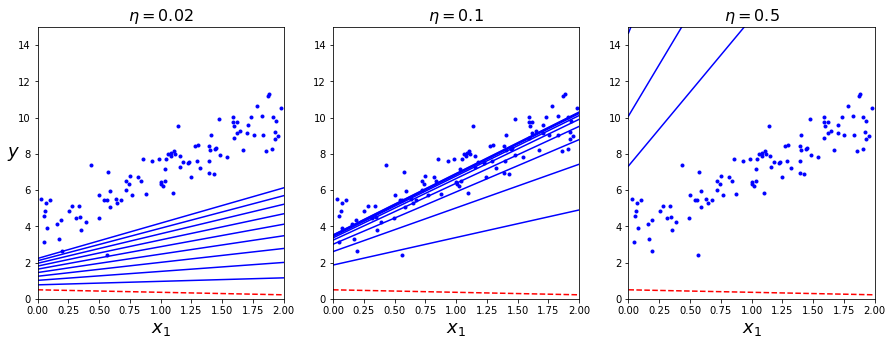

In [63]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(15,5))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

-  As we can see the figure on the left where learning rate is __too low__: the algorithm will eventually reach th solution but it will take really long time.<br>
-  In the middle, the learning rate is 0.1 and it looks like __optimal value__ for it. Since it reaches convergence in a few iterations.<br>
-  On the right , the learning rate is __too high__: the algorithm diverges and jumps over actuall solution that we want.<br>

<div class="alert alert-block alert-info">
<b>Tip: </b> Obviously the optimal value for learning rate would be different with different tasks. And learning rate will affect a algorithm the most out of all hyper-parametrs. So its worth the time to tune it. There is no much reliable ways to tune it so one of the ways would be just simple trial and error.
</div>

# Stochastic Gradient Descent

___The disadvantage of batch Gradient Descent is that it uses the whole training set to compute the gradients at every step. This method cen be sometimes slow for example when we need to use large data set. Thats where Stochastic Gradient Descent comes in. It picks a random instance in the training set at every step and computes the gradients based only on that single instance. Which makes the algorythm much faster. (also SGD can be implemented as out-of-core algorithm) Possible disadvantage of SGD is its random nature. Over time the SGD will bring us very close to minimum, but when it gets there it will continue to bounce around, never settling donw. Altho the iregularity of cost function can actullay help the algorithm not to get stuck in local minimum so it hase batter chance to find global minimum.___

>  One of the ways we can sort of solve the problem of SGD is gradually reduce the learning rate. The steps start out large, then get smaller and smaller, allowing the algorithm to settle at the global minimum.

In [64]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

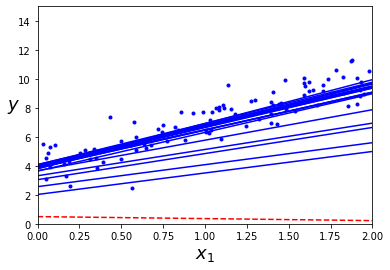

In [65]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                         
plt.show()

In [66]:
theta

array([[3.90521218],
       [3.15642095]])

<div class="alert alert-block alert-info">
<b>Tip:</b> There is a way in sklearn to use SGD using code like this:<br> 
    <b>sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)<br>
    sgd_reg.fit(X, y.ravel())
    </b>
</div>

***

# Mini-batch gradient descent

Mini-bath gradient descent is sort of like combination of SGD and BatchGD. At each step, instead of computing the gradients based on full training set (like BatchGD) or based on just one instance (like SGD), Mini-batch computes the gradients on small random sets of instances called __Mini-batches__. The advantage of Mini-batch over SGD is that you can get a performance boost from hardware optimization of matrix operations. It is less erratic than SGD, but little less likely to escape local minima.

In [67]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [68]:
theta

array([[3.87558894],
       [3.13893713]])

In [69]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

>  The figure below shows comparison of Batch, Stochastic and Mini-batch gradient descents

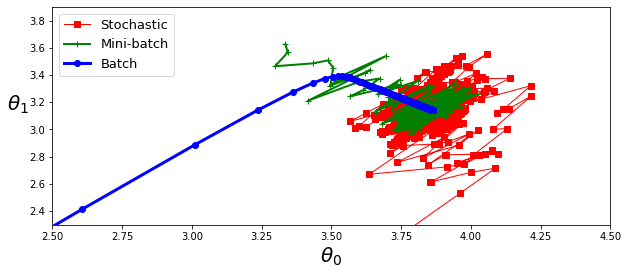

In [70]:
plt.figure(figsize=(10,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=13)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

***

# Polynomial Regression

What if our data is more complex than a simple straight line? Well we can still fit linear model to nonlinear data. A way to do this is to add powers of each feature as new feature. This technique is called ___Polynomial Regression___.

In [71]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

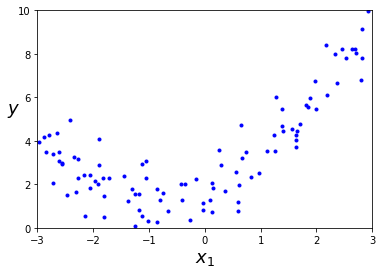

In [72]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

We can see that on data like this. We cannot fit straight line. But lets see how we can fit function with polynomials. Using `sklearn.preprocessing` we can create polynomial features.

In [73]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [74]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

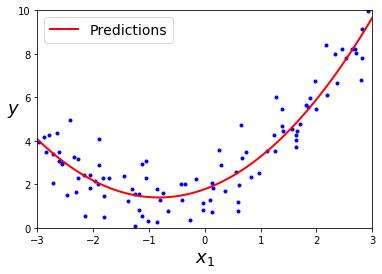

In [75]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

We can see that second degree of polynomial worked well which is not surprising given data we had. We can set what degree of polynomila to use when we set up the `PolynomialFeatures(degree=2)` class.

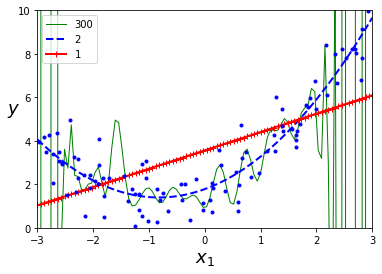

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

On the figure above we can see 3 different linear regressions using different polynomial fetures. The one using pure linear model clearly underfit the data and is just too simple. Straight line can never fit data like this. On the other hand, we have 300 polynomial model. Which is trying to get us as close to data as posible. But it will not generlize well. Its clear example of over-fitting. So in cocnlusion the quadratic (2nd-degree polynomial) fits the best. We have to find the proper degreee of polynomial to fit our uniquq data. And as we can see one of the ways ___we can reduce over-fitting is simplyfy our model to have samller degree of polynomial___ and we can adress ___under-fitting by icreasing the the degree of polynomial___.

Another way to know if you have propper complexity of your model is to look at the learning curves: these are plots of the models performance on the training set size (or the training set iteration). To generate the plots, simply train the model several times on different sized subsets of the training set.

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)

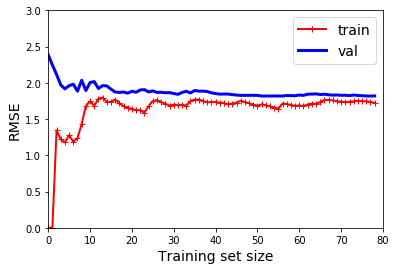

In [78]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()                               

These are learning curves of plain Linear Regression model. Let look at the performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set does not make the average error much better. Now lets look at the performance of the model on the validation data. When the model is trained on very few training instances it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. however, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve. These learning curves are typical example of ___under-fitting model___. Both curves reached plateau and they are close and fairly high.

<div class="alert alert-block alert-info">
<b>Tip:</b> If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model (increas degree of polynomial) or come up with better features.
</div>

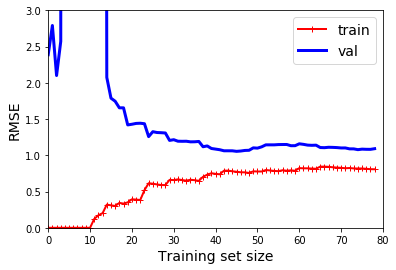

In [79]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Now we used $10^{th}$-degree polynomial model on the sam data. On these learning curves we can see that the error of training data is much lower than with the Linear Regression model. And there is a bigger gap between which signifies that the model performs signigicantly better on the training data than on the validation data, which is the ___sign of over-fitting___. In this instance having larger training set will be advantage.

<div class="alert alert-block alert-info">
<b>Tip:</b> One way to improve an over-fitting model is to feed it more training data until the validation error reachs the training error. Or maybe try to decrease the degree of polynomial.<b/>
</div>

There are two important errors when it comes to ML.
- ___Bias___
    This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the data.
- ___Variance___
    This part is due to the models excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.

***

# Logistic Regression

> Now we arrived at Logistic Regression. One of regression algorithms that can be used for classification. It is used to estimate the probability that an instane belongs to a praticular class.
equation for logistic Regression model estimated probability (vectorized form)

> ### $\widehat{p} = h_\theta(X) = \sigma(\theta^Tx)$
> # $\sigma(t) = \frac{1}{1 + e^{-t}}$

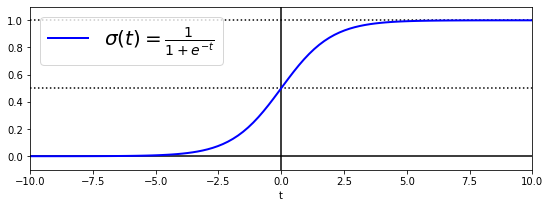

In [80]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

Once the Logistic Regression model has estimated the probability $\widehat{p} = h_\theta(X)$ that an instance x belong to the positive class, it can make its prediction $\widehat{y}$ easily.
> $\widehat{y} = 0$ if $\widehat{p} < 0.5$ and $\widehat{y} = 1$ if $\widehat{p} \ge 0.5$

Logistic Regression using sigmoid predicts 1 if $\theta^Tx$ is positive, and 0 if it is negative.

__Cost function__

### $J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\widehat{p}^{(i)}) + (1 - y^{(i)}log(1 - \widehat{p}^{(i)}))]$

derivative of $J(\theta)$ with respect to $\theta_j$

### $\frac{\partial}{\partial\theta_j}  J(\theta) = \frac{1}{m}\sum_{i=1}^m(\sigma(\theta^Tx^{(i)})x_j^i)$

Now lets try to build a classifire to detect the Iris-Virginica type based only on the petal width feature.

In [81]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [82]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [83]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

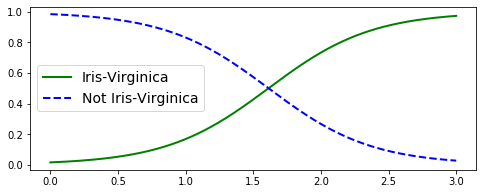

In [84]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.legend(loc="center left", fontsize=14)

> This is models estimated probabilities for flowers with petal widths varying from 0 to 3 cm. The petal width of Iris_Virginica flowers ranges from 1.4 cm to 2.5 cm, while the other iris flowers generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. The cross section is where the "decision" is made and its called __decision boundary__.

***

### Softmax Regression

> The logistic regression can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. Like __Softmax Regression__, or __Multinomial Logistic Regression__.

The idea behind __Softmax Regression__ is that when given an instance __x__, the Softmax Regression model first computes a score $S_k(x)$ for each class `k`, than estimates the probability of each class by applying the softmax function to the scores. The equation to compute $S_k(x)$:
> ### $S_k(x) = (\theta^{(k)})^Tx$

__Softmax function__
> ### $\widehat{p}_k = \sigma(s(x))_k = \frac{e^{(s_k(x))}}{\sum^K_{j=1} e^{(s_j(x))}}$

* K is the number of classes.
* `s(x)` is a vector containing the scores of each class for the instancex.
* $\sigma(s(x))_k$ is the estimated probability that the instance `x` belongs to class `k` given the scores of each class for that instance.

<div class="alert alert-block alert-info">
<b>Tip:</b> The Softmax Regression classifier predicts only one class at a time (it is multiclass, not multioutput) so it should be used only with mutually exclusive classes such as different types of plants. You cannot use it to recognize multiple people in one picture for example.
</div>

Now lets look how to train sucha a classifier. The objective is to have a model that estimates a high probability for the target class. Minimizing the cost function called the __cross entropy__, dhould lead to this objective because it penalizes the model when it estimates a low probability for a target class.
> ### $J(\theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)}log(\widehat{p}_k^{(i)})$

* $y_k^{(i)}$ is the target probability that the $i^{th}$ instance belongs to class k. In general, it is either equal to 1 or 0, depending on whether the instances belongs to the class or not.

In [85]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The code above is using `LogisticRegression` class from sklearn. We can specify the __multi_class__ parameter to use __multinomial__ to switch it to Softmax Regression. We must also specify a slover that suppoerts Softmax Regression, such as the "lbfgs" (Limited-memory BFGS) solver. It aslo applies regularization by default which we can control using the parameter `C`.